# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
plot_label="Volume"

# Load data

In [2]:
df = pd.read_csv("./data/gardiner_count_incidents.csv.zip")
df

,volume_15min,number_of_lanes,dist_from_mid_point,magnitudeOfDelay,length,delay,day,hour,minute,direction_E,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,160.0,3.0,4.887837,0.0,0.0,0.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,170.0,3.0,0.474912,0.0,0.0,0.0,11.0,15.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,169.0,3.0,-0.635254,0.0,0.0,0.0,11.0,15.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,123.0,3.0,-0.633557,0.0,0.0,0.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,134.0,3.0,-7.665465,0.0,0.0,0.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,98.0,3.0,-7.668009,0.0,0.0,0.0,1.0,5.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145237,439.0,3.0,0.474912,0.0,0.0,0.0,1.0,5.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145238,243.0,3.0,0.474912,0.0,0.0,0.0,1.0,5.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145239,365.0,5.0,-1.750579,0.0,0.0,0.0,1.0,5.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Split data set into train and test

In [3]:
X = df.drop("volume_15min",axis=1)
y = df["volume_15min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Sample 50% of remaining training data to run CV.
- The idea is have enough data that is representative of the dataset, while speeding up the CV performed by GridSearchCV.

In [4]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Show model metrics to determine what algorithms to run

In [5]:
metrics = pd.read_csv("./metrics/092_initial_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,9.633675e-01,4.714686e+01,5.712608e+03,7.558180e+01,1.917852e+15,26.619922,0.729137
1,XGBoost,9.446884e-01,6.416706e+01,8.625500e+03,9.287357e+01,3.310642e+15,2.099765,0.029035
2,Decision Tree,9.373232e-01,5.894048e+01,9.774064e+03,9.886387e+01,9.722553e+14,0.458292,0.014450
3,MLP,8.062869e-01,1.274807e+02,3.020838e+04,1.738056e+02,6.057250e+15,107.349809,0.029410
4,Lasso,3.316644e-01,2.660500e+02,1.042229e+05,3.228357e+02,6.104708e+15,0.273826,0.003667
5,Elastic Net,2.918939e-01,2.777717e+02,1.104248e+05,3.323023e+02,6.314159e+15,0.061800,0.005227
6,Logistic Regression,-5.125941e-02,2.818926e+02,1.639375e+05,4.048920e+02,2.057225e+15,375.133025,0.526195
7,Linear Regression,-2.278238e+22,3.497242e+11,3.552774e+27,5.960515e+13,6.106097e+15,0.116739,0.003849


# Run ML tasks

## Random Forest

Best params for Random Forest already found!
Fitting model...
Fitting model... OK! Took 14.194492101669312 seconds

model Random Forest
r2 0.844833427229757
mae 113.43536410260555
mse 24197.283451011932
rmse 155.55476029685474
mape 4951081398187940.0
time_to_fit 14.194492101669312
time_to_predict 0.12898612022399902

Dumping model...
Dumping model... OK! Took 0.22287774085998535 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


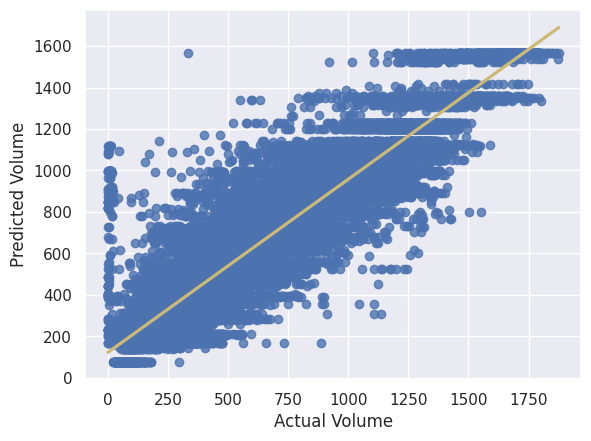

In [6]:
from sklearn.ensemble import RandomForestRegressor

file_name = "093_random_forest"
model_name = "Random Forest"

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [16,32,48],
    "max_leaf_nodes": [10,50,100],
    "min_samples_leaf": [1,5,10],
    "min_samples_split": [2,8,16]
}

estimator = RandomForestRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## Decision Tree

Best params for Decision Tree already found!
Fitting model...
Fitting model... OK! Took 0.23184490203857422 seconds

model Decision Tree
r2 0.8361635762584267
mae 115.95723131342886
mse 25549.293988371293
rmse 159.8414651721239
mape 5104655331149627.0
time_to_fit 0.23184490203857422
time_to_predict 0.004971027374267578

Dumping model...
Dumping model... OK! Took 0.0031609535217285156 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


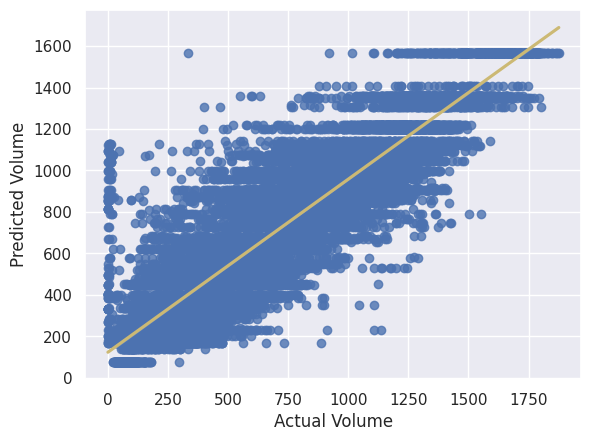

In [7]:
from sklearn.tree import DecisionTreeRegressor

file_name = "093_decision_tree"
model_name = "Decision Tree"

param_grid = {
    "random_state": [42],
    "criterion": ["squared_error"],
    "splitter": ["best"],
    "max_depth": [6,8,16,32,64,128],
    "min_samples_split": [2,4,8,16,32],
    "min_samples_leaf": [1,5,10,15,30],
    "max_leaf_nodes": [10,30,50,75,100]
}

estimator = DecisionTreeRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## XGBoost

In [9]:
import xgboost as xgb

file_name = "093_xgboost"
model_name = "XGBoost"

param_grid = {
    "random_state": [42],
    "objective": ["reg:squarederror"],
    "tree_method": ["gpu_hist"],
    "predictor": ["gpu_predictor"],
    "num_parallel_tree": [10],
    "max_depth": [6, 8, 16],
    "n_estimators": [100, 250, 350],
    "max_leaves": [20, 40, 80],
    "alpha": [0.01, 0.1, 1],
    "learning_rate": [0.3, 0.5, 0.9]
}

estimator = xgb.XGBRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)
    
model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## MLP

Testing 216 param combinations for MLP. CV=5. Total fits: 1080

Searching space...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
 

Searching space... OK! Took 6624.078698396683 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 370.09558176994324 seconds

model MLP
r2 0.9237998017053046
mae 74.81165840974498
mse 11882.957548403496
rmse 109.00897920998754
mape 3952443494736589.0
time_to_fit 370.09558176994324
time_to_predict 0.08192753791809082

Dumping model...
Dumping model... OK! Took 0.03027510643005371 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


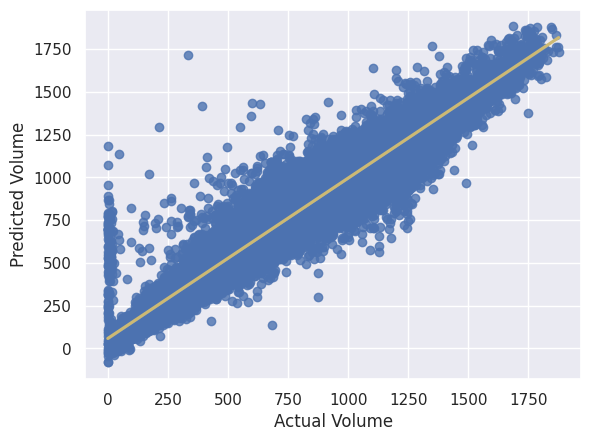

In [10]:
from sklearn.neural_network import MLPRegressor

file_name = "093_mlpr"
model_name = "MLP"

param_grid = {
    "random_state": [42],
    "hidden_layer_sizes": [(100), (100,50), (100,50,25)],
    "alpha": [0.0001, 0.001, 0.1],
    "learning_rate_init": [0.001, 0.1],
    "max_iter": [900, 1000, 1200],
    "tol": [1e-4],
    "epsilon": [1e-8, 1e-4],
    "n_iter_no_change": [3, 10]
}

estimator = MLPRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train